In [222]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

dataset = pd.read_csv('data/bank-customers-for-analysis.csv')
dataset.sample()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,deposit,credit_history,credit_score,psychographic,income_bracket,cc_with_points
195,45,technician,single,secondary,no,410,yes,no,unknown,30,...,4,-1,0,unknown,yes,22,744,0,40K-60K,True


In [223]:
dataset['job'].replace(['admin.', 'entrepreneur', 'management', 'services', 'technician'], 0, inplace=True)
dataset['job'].replace(['blue-collar', 'housemaid', 'self-employed'], 1, inplace=True)
dataset['job'].replace(['retired', 'student', 'unemployed', 'unknown'], 2, inplace=True)
dataset['education'].replace({'primary': 0, 'secondary': 1, 'tertiary': 2, 'unknown': 3}, inplace=True)
dataset['marital'].replace({'single': 0, 'married': 1, 'divorced': 2}, inplace=True)
dataset['default'].replace({'no': 0, 'yes': 1}, inplace=True)
dataset['housing'].replace({'no': 0, 'yes': 1}, inplace=True)
dataset['loan'].replace({'no': 0, 'yes': 1}, inplace=True)
dataset['income_bracket'].replace({'<40K': 0, '40K-60K': 1, '60K-100K': 2, '100K+': 3}, inplace=True)

dataset.drop(columns=['contact', 'day', 'month', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit', 'credit_history'], axis=1, inplace=True)

dataset.sample()

/tmp/ipykernel_24686/1549360168.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['job'].replace(['admin.', 'entrepreneur', 'management', 'services', 'technician'], 0, inplace=True)
/tmp/ipykernel_24686/1549360168.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['job'].replace([

,age,job,marital,education,default,balance,housing,loan,duration,credit_score,psychographic,income_bracket,cc_with_points
5906,45,0,2,1,0,0,0,0,64,795,2,2,True


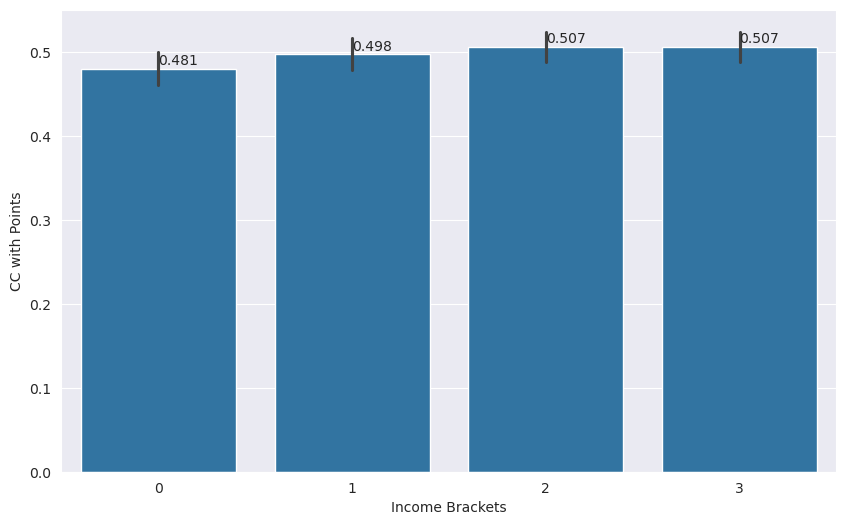

In [224]:
fig, ax = plt.subplots(figsize=(10, 6))
bp = sns.barplot(data=dataset, x='income_bracket', y='cc_with_points', ax=ax)

plt.ylabel('CC with Points')
plt.xlabel('Income Brackets')

for g in bp.patches:
    bp.annotate(format(g.get_height(), '.3f'), (g.get_x() + g.get_width() / 2, g.get_height() + 0.005))

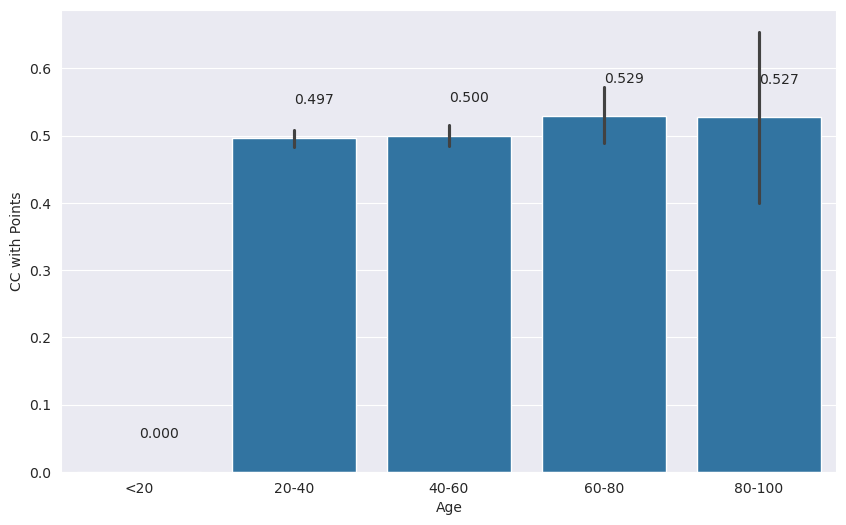

In [225]:
fig, ax = plt.subplots(figsize=(10, 6))
age_bins = [0, 20, 40, 60, 80, 100]
dataset['age'] = pd.cut(dataset['age'], bins=age_bins, labels=['<20', '20-40', '40-60', '60-80', '80-100'])
bp = sns.barplot(data=dataset, x='age', y='cc_with_points', ax=ax)

plt.ylabel('CC with Points')
plt.xlabel('Age')

for g in bp.patches:
    bp.annotate(format(g.get_height(), '.3f'), (g.get_x() + g.get_width() / 2, g.get_height() + 0.05))

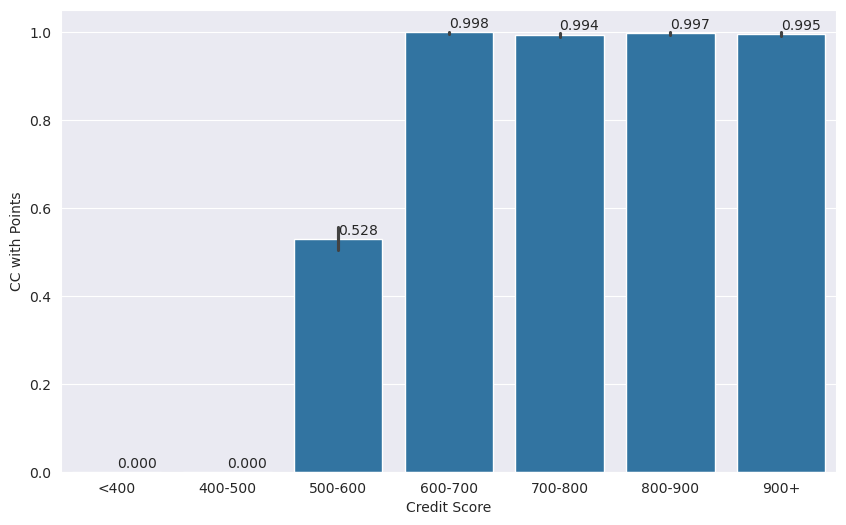

In [226]:
fig, ax = plt.subplots(figsize=(10, 6))
credit_bins = [0, 400, 500, 600, 700, 800, 900, 1000]
dataset['credit_score'] = pd.cut(dataset['credit_score'], bins=credit_bins, labels=['<400', '400-500', '500-600', '600-700', '700-800', '800-900', '900+'])
bp = sns.barplot(data=dataset, x='credit_score', y='cc_with_points', ax=ax)

plt.ylabel('CC with Points')
plt.xlabel('Credit Score')

for g in bp.patches:
    bp.annotate(format(g.get_height(), '.3f'), (g.get_x() + g.get_width() / 2, g.get_height() + 0.01))